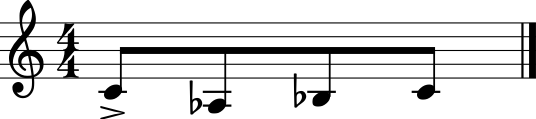

In [2]:
from music21 import converter, interval, pitch, note, stream, meter, articulations
import re
import copy

scores = dict()

cells = [
    "c d e c",
    "c d e- c",
    "c d- e- c",
    "c d# e c",
    "c d- e c",
    "c d- d c"
]

def cell_transform(cell_string, mode=[]):    
    notes = cell_string.split(' ')
    duration_match = re.match(r'^((\w)([b\-#])?)(\d+)?.*', notes[0])
    first_note = duration_match[1]
    dur = duration_match[4]
    notes[0] = first_note

    intervals = []
    
    octave = "4"

    for n in notes:
        args = [
            note.Note(first_note + octave),
            note.Note(n + octave)
        ]
        if 'inversion' in mode:
            args.reverse()
            
        inter = interval.Interval(*args)
            
        intervals.append(inter)

    if 'retrograde' in mode:
        intervals.reverse()
    
    reverse_notes = []

    for i in intervals:
        next_note = note.Note(first_note + octave, quarterLength=0.5)
        reverse_notes.append(
            i.transposeNote(next_note)
        )

    #return ' '.join(notes)
    return reverse_notes

music_stream = stream.Stream()
for n in cells[1].split(' '):
    music_stream.append(note.Note(n))

transformed_stream = stream.Stream()
for n in cell_transform(cells[0], mode=['retrograde', 'inversion']):
    transformed_stream.append(n)

transformed_stream.notes[1].beams.fill(1, 'continue')
transformed_stream.notes[0].articulations.append(articulations.Accent())

transformed_stream.show()

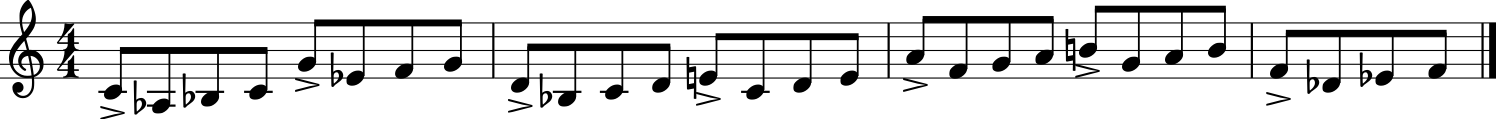

In [7]:
s = stream.Stream()
s.append(meter.TimeSignature('4/4'))

progression = 'cgdeabf'

for l in progression:
    intervl = interval.Interval(note.Note('c'), note.Note(l))
    s.append(transformed_stream.transpose(intervl))

s = s.makeMeasures()
s.show()


In [10]:
s.show('midi')